<a href="https://colab.research.google.com/github/pedro-de-bastos/CS166-Modeling-Simulation-and-Decision-Making/blob/main/Assignment_2_Cellular_Automata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Ceullular Automata Problem Set

By: Pedro M. de Bastos

# Problem 1

For this exercise, I implemented the CA in python:

In [2]:
rule_30 = {"111":0, "110":0, "101":0, "100":1, "011":1, "010":1, "001":1, "000":0}

In [ ]:
init = [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0]


def run_rule(init, steps, rule, print_it=False):
  cells = len(init)
  for i in range(steps):
    if print_it==True:
      print(f"Step {i}", init)
    next = [0 for i in range(cells)] #creating an empty list as a 'canvas' for the
                                    #next iteration
    for i, j in enumerate(init):
      left = init[(i-1)%cells] #using the modulo to implement periodic boundaries
      right = init[(i+1)%cells]
      next[i] = rule[f"{left}{j}{right}"] #passing a string to the rule_30
                                          #dictionary I created to obtain the
                                          #next result
    init = next
  return next

results = run_rule(init, 11, rule_30, print_it=True)

Step 0 [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0]
Step 1 [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
Step 2 [1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Step 3 [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Step 4 [1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Step 5 [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Step 6 [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1]
Step 7 [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1]
Step 8 [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1]
Step 9 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1]
Step 10 [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1]


# Problem 2

For this problem, I considered two routes: (a) for each possible state of the CA, finding if any other CA will lead to it and (b) for each possible state of the CA, determining if no other CA can possibly lead to it.

Approach (b) seems more graceful as approach (a) is a brute force approach. However, I found that to solve the problem through approach (b), I'd have to solve a complex combinatorial problem. On the other hand, while problem (a) is in fact brute force, I considered that for the 10 cell version of the problem, there are $2^{10}=1024$ possible states of the CA. For each of these 1024 states, I'd have to check whether any of the 1024 states would lead to that state. That means $1024^2=1048576$, which is in the magnitude of $10^6$ computations. After making these estimations, I decided that the brute force search is actually quite feasible for this 'small' search space, and so I went with it:

In [1]:
#Like above, I create a dictionary to map rule 18
rule_18 = {"111":0, "110":0, "101":0, "100":1, "011":0, "010":0, "001":1, "000":0}

The first problem was finding and storing all possible states of the CA. The algorithm below finds all possible permutations of the state given a particular number of 1s and 0s, and ultimately adds all unique combinations to a list:

In [ ]:
from itertools import permutations

all_init_states = []
for i in range(11):
  next = np.zeros(10)
  for j in range(i):
    next[j] = 1
  perms = set(permutations(next))
  for i in perms:
    all_init_states.append(i)

Next, I go through the comprehensive list, and I use the CA solver "run_rule" I defined above to, for each possible state of the CA, find if any other CA will result on that CA. I.e, will any single one of the 1024 possible states lead to the state under scrutiny? If not, then I add it to the gardens_of_eden list.

In [ ]:
gardens_of_eden = []

for k in range(len(all_init_states)):
  one = [int(j) for j in all_init_states[k]]
  tally = 0

  for i in all_init_states:
    if run_rule([int(j) for j in i], 1, rule_18) == one:
      tally += 1
  if tally == 0:
    gardens_of_eden.append(one)

Do we have the expected number of gardens?

In [ ]:
len(gardens_of_eden)

808

In [ ]:
for i in gardens_of_eden:
  print(i)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
[0, 1, 0, 0, 0, 0, 0, 1, 0, 1]
[0, 0, 1, 1, 0, 0, 1, 0, 0, 0]
[1, 0, 0, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 1, 1, 0, 1]
[0, 0, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 0, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 0, 0, 1, 0, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 1]
[0, 1, 0, 0, 0, 1, 0, 0, 0, 1]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 1, 1, 0]
[1, 0, 0, 1, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 1, 0, 1]
[0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
[0, 1, 0

# Problem 3

The Waves in Excitable Media Cellular Automata is specified as follows:

*Densities*
*   $p_0=$density of quiescent cells (cells with value 0)
*   $p_1=$density of excited cells (cells with value 1)
*   $p_2=$density of refractory cells (cells with value 2)

*Update Rules*
*   Cells are initialized to be excited (1) with probability $p_1=10^{-4}$
*   We use a moore neighborhood with radius 1 (square with 9 cells in total, wherein the middle cell is the cell to be updated)
*   A quiescent cell becomes excited if any of its neighbors trigger it. A neighbor triggers it with probability $p_t=\frac{1}{3}$
*   Excited cells become refractory (2) in the next step
*   Refractory cells become quiescent (0) in the next step




## Transition from Quiescent Cells

### Transition from Quiescent to Refractory

Quiescent cells cannot become refractory, they have to become excited first. Therefore, this probability is zero.

### Transition from Quiescent to Excited

For a quiescent cell to become excited, it has to be quiescent, and at least one of its eight neighbors has to (a) be excited and (b) pass on the excitment.

The probability that exactly one of the neighbors is excited is:

 ${8\choose1}(p_{1})(1-p_{1})^7$

 The probability that that neighbor excites the cell in question is then:

 ${1 \choose 1}*p_t^{1}*(1-p_t)^0 = p_t$

 Putting those together gives us:

  ${8\choose1}(p_{1})(1-p_{1})^7*p_t$

 Now, the probability that exactly two of the neighbors are excited and that at least one of them excites our cell is:

  ${8\choose2}(p_{1})^2(1-p_{1})^6*({2 \choose 1}*p_t^{1}*(1-p_t)^1+{2 \choose 2}*p_t^{1}*(1-p_t)^0)$

  For each of those k numbers of excited neighbors (from 1 to 8), the probability that at least one of them will excite our cell is:

$\sum_{i=1}^k{k \choose i}(p_t)^{i}(1-p_t)^{1-i}$

Note that to simplify, we can also ask: what is the probability that none of those k neighbors excite our cell? This is much simpler because there is only one way combinatorily for that to happen: k instances of no excitement. That is:

$1-(1-p_t)^k$ (Note that now we don't have a further sum *for each value of k*).

  Finally, we have to factor in the probability that the cell in question is quiescent in the first place:

  $p_0=1-p_1-p_2$

  So in the end we have that the probability of this transition is:

  $(1-p_1-p_2)*\sum_{k=1}^{8}{8\choose k}(p_1)^k(1-p_1)^{8-k}(1-(1-p_t)^k)$

### Transition from Quiescent to Quiescent

If a cell is quiescent, the probability that it remains quiescent is the probability that it doesn't become excited or refractory.

We know that quiescent cells cannot become refractory (only excited), therefore that probability is zero. Thus, the probability that a cell goes from quiescent to quiescent is (1 - the probability from quiescent to excited). 

The probability that a cell is quiescent to begin with is:

$p_0=1-p_1-p_2$

From above, the probability that a cell transitions from quiescent to excited is:

 $(1-p_1-p_2)*\sum_{k=1}^{8}{8\choose k}(p_1)^k(1-p_1)^{8-k}(1-(1-p_t)^k)$

 Note that the last part of the expression, $(1-(1-p_t)^k)$, is what indicates whether or not the excitement is passed on. $(1-(1-p_t)^k)$ means the probability that at least one of the cells will pass it on. If we want the probability that none of those cells will pass the excitement on, we simply have: $(1-p_t)^k$. Thus, our final transition probability is:

 $(1-p_1-p_2)*\sum_{k=1}^{8}{8\choose k}(p_1)^k(1-p_1)^{8-k}(1-p_t)^k$

## Transition from Excited Cells

### Excited to Excited

Cannot occur, probability = 0.

### Excited to Refractory

Has to occur, probability = $p_1$.

### Excited to Quiescent

Cannot occur, probability = 0.

## Transition from Refractory Cells



## Refractory to Quiescent

Has to occur, probability = $p_2$.

## Refractory to Refractory

Cannot occur, probability = 0.

## Refractory to Excited

Cannot occur, probability = 0.

## Density of Excited Cells

The only transition that leads to excited cells is from quiescent ones. Thus we have:

$p_{1,t+1}=(1-p_{1,t}-p_{2,t})*\sum_{k=1}^{8}{8\choose k}(p_{1,t})^k(1-p_{1,t})^{8-k}(1-(1-p_t)^k)$

In [ ]:
from scipy import special

def e_density(p1, p2, pt):
  suma = 0
  for k in range(1, 9):
    suma += special.binom(8, k)*(p1**k)*((1-p1)**(8-k))*(1-(1-pt)**k)
  return (1-p1-p2)*suma

## Density of Refractory Cells

The only transition that leads to refractory cells is from excited to refractory. Thus:

$p_{2,t+1}=p_{1, t}$

In [ ]:
def r_density(p1):
  return p1

## Approximation

Now, we'd like to see, at each step, what we expect the path of the density of excited cells to be like! Using the functions I defined above, we can calculate the next density of excited cells and the next density of refractory cells (needed for the excited cell density) and thereby estimate if and how the value of excited cells converges.

In [ ]:
p1 = 10**-4
p2 = 0
pt = (1/3)

p1_path = []
p2_path = []
p11_path = []
p21_path = []


for i in range(100000):
  p1_path.append(p1)
  p2_path.append(p2)
  p1 = e_density(p1, p2, pt)
  p2 = r_density(p1) #this is basically just preserving the old number of excited
                    #cells for calculation in the next iteration.
  p11_path.append(p1)
  p21_path.append(p2)

we can now plot the path for $p_{1, t}$ versus $p_{1, t+1}$:

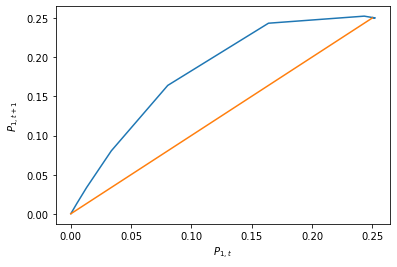

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(0, 0.25, num=200)

plt.plot(p1_path, p11_path)
plt.xlabel('$P_{1, t}$')
plt.ylabel("$P_{1, t+1}$")
plt.plot(x, x)

From the cobweb plot above, it seems like we have asymptotic behavior at around density = 0.25. We can see that for densities lower than that, it is likely that the density will increase up until 0.25. The question now is: how does this match simulated results (if it does at all?) I run the simulation, below, to verify:

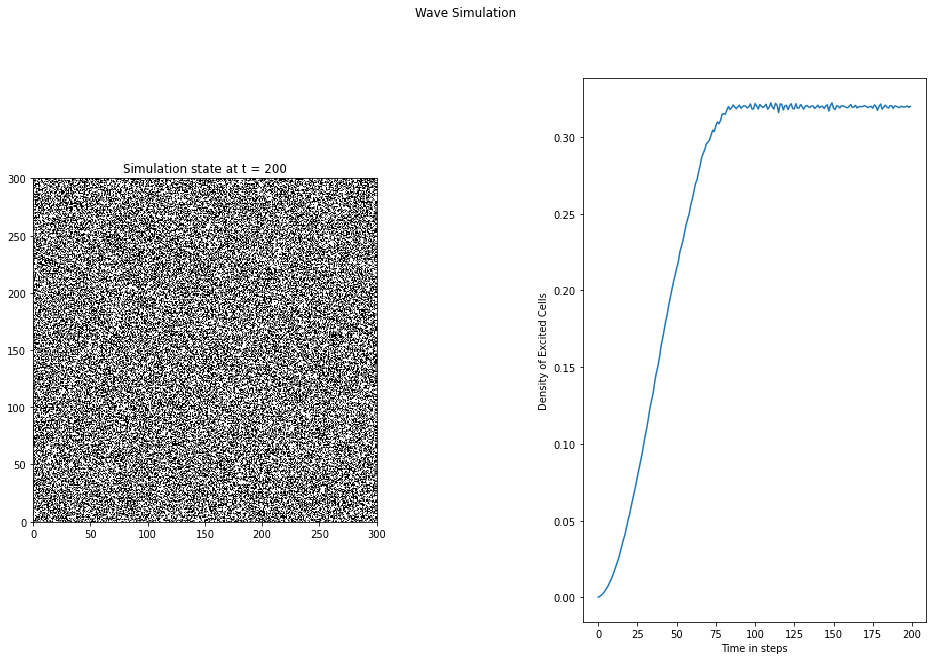

In [ ]:
#Does it match simulated results???

import matplotlib

import pylab as PL
import random as RD
import scipy as SP

RD.seed()

width = 300
height = 300
initProb = 10**(-4)
qui, excited, refrac = range(3)

def init():
    global time, config, nextConfig
    global excited_prop
    excited_prop = []

    time = 0

    config = np.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = excited
            else:
                state = qui
            config[y, x] = state

    nextConfig = np.zeros([height, width])

def draw():
  fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'wspace':0.6}, figsize=(16,10))
  fig.suptitle('Wave Simulation')
  
  ax1.pcolor(config, vmin = 0, vmax = 2, cmap = PL.cm.binary)
  ax1.axis('image')
  ax1.set_title('Simulation state at t = ' + str(time))

  global excited_prop
  
  ax2.plot(range(len(excited_prop)), excited_prop)
  ax2.set_xlabel('Time in steps')
  ax2.set_ylabel("Density of Excited Cells")
  fig.show()

def step():
    global time, config, nextConfig
    global excited_prop

    excited_prop.append(np.sum(config==1)/(width*height)) #keeping track of 
                                                          #the density
    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == excited:
                state = refrac
            elif state == refrac:
                state = qui
            elif state == qui:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == excited:
                            if RD.random() > (1/3):
                                state = excited
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config


init()
for i in range(200): #after experimenting, we see convergence after around 20 steps
                    #if we start with p1 = 0.01
  step()
draw()


As we can see form the graph on the right, our simulation converges to a value slilghtly over 30. Note that this is slightly above what our approximation with mean field analysis predicted (convergence to around 0.25 instead of 0.31 or such), but it was still a fairly good approximation! We do in fact expect slightly different answers than what MFA predicts since we are making some assumptions about the CA that don't necessarily hold true. One of these assumptions is that the probability, $p_1$, of finding an excited cell, is i.i.d. This is not a good assumption, because we know that it is quite likely that excited cells will form clusters! That is, the density of excited cells is not evenly and randomly distributed throughout the CA. This could be the source of bias we are witnessing.

# Problem 4

## One Dimensional Forest

First, let us consider percolation for a one-dimensional tree C.A. In this case, when we have a single cell, then the density is trivial: its simply q, the probability that a tree exists. Now, for two cells side by side, there is only one option for conductance to occur: we must have two trees. Thus, taking $p_s$ as the previous density, we know have $p_{s+1} =p_{s}^2= q^2$ as our new density. When we have four cells, in turn, and these four cells must be composed of a combination of our conductive states in the previous size step, we end up with one option again: we need all four cells to have trees in order for conduction to occur, and so $p_{s+2} = p_{s+1}^2 = q^4$. The general form of our function $\Phi(p_s)=p_{s+1}$ is $\Phi(p_s)=p_s^2$.

[<img src="https://docs.google.com/drawings/d/e/2PACX-1vQSarNOn262WVHRPBSHuN_PFOu4nnFWIQJSBZYek0LClXHK8HDHfffrqYuzU0JJIorXAbmUxtYpzk8M/pub?w=951&h=501">](https://docs.google.com/drawings/d/e/2PACX-1vQSarNOn262WVHRPBSHuN_PFOu4nnFWIQJSBZYek0LClXHK8HDHfffrqYuzU0JJIorXAbmUxtYpzk8M/pub?w=951&h=501)

## Three Dimensional Forest

Firstly, for the three dimensional forest, the probability of any single cube (as we are now in 3d, we have cubes instead of squares) having a tree is q. When we jump beyond the trivial problem of the single cube, we get an exponentially more complicated problem of a 4x4 supercube, composed of a total of 8 small cubes.

The way I conceptualized the three dimensional forest problem was by dividing the 4x4 supercube into two quadrants: the green and red quandrants below.

I realized the following: fire will spread from side (1) to side (2), labeled below, if and only if there is at least one cube in each of the green and red quadrants. If there is at least one cube in each of these quadrants, no matter where these two cubes are, the fire can spread. If there is anywhere from 1 to 4 cubes in one of the quadrants, but none in the other, the fire can never spread. Therefore, we simplify the problem greatly by simply counting how many ways we can arrange a certain number of small cubes within each quadrant, and multiplying those combinations by the number of combinations of how we can fit squares into the other quadrant.

[<img src="https://docs.google.com/drawings/d/e/2PACX-1vRXH5TI1udNOw0vVP1Xrj62NZdwrK6WUZxUeCl43Z8oT88YINZ0H_7zZyH0aLyAQEcZB8UwQsS2Oy3o/pub?w=768&h=617">](https://docs.google.com/drawings/d/e/2PACX-1vRXH5TI1udNOw0vVP1Xrj62NZdwrK6WUZxUeCl43Z8oT88YINZ0H_7zZyH0aLyAQEcZB8UwQsS2Oy3o/pub?w=768&h=617)

Now, we can break the problem down into very tractable sub problems:

### 8 trees

If we have 8 trees, all cubes are trees, and fire will spread. The probability is $p_s^8$.

### 7 trees

For 7 trees, we have the following possibilities:

#### Green quadrant has 4 trees, red quadrant has 3.

This means we have ${4 \choose 4}*{4 \choose 3}$ combinations.

#### Green quadrant has 3 trees, red quadrant has 4.

This means we have ${4 \choose 3}*{4 \choose 4}$ combinations.

#### Sum

${4 \choose 4}*{4 \choose 3}*2=8$

The probability of these cubes having 7 trees and one being empty is $(p_s)^7(1-p_s)$

Together we have: 

$8(p_s)^7(1-p_s)$

### 6 Trees

#### 4 Green, 2 Red

${4 \choose 4}{4 \choose 2}=6$

#### 3 Green, 3 Red

${4 \choose 3}{4 \choose 3}=16$

#### 2 Green, 4 Red

${4 \choose 2}{4 \choose 4}=6$

#### Sum

$28*p_s^{6}(1-p_s)^{2}$

### 5 Trees

#### 4 Green, 1 Red or Vice Versa

$2*{4 \choose 4}{4 \choose 1}=8$

#### 3 Green, 2 Red or Vice Versa

$2*{4 \choose 3}{4 \choose 2}=32$

#### Sum

$40*p_s^5*(1-p_s)^3$

### 4 Trees

#### 3 Green, 1 Red or Vice Versa

$2*{4 \choose 3}{4 \choose 1}=32$

#### 2 Green 2 Red

${4 \choose 2}{4 \choose 2}=36$

#### Sum

$68*p_s^4*(1-p_s)^4$

### 3 Trees

#### 2 Green, 1 Red or Vice Versa

$2*{4 \choose 2}{4 \choose 1}=32$

#### Sum

$32*p_s^3*(1-p_s)^5$

### 2 Trees

#### 1 Green and 1 Red

${4 \choose 1}{4 \choose 1}=16$

#### Sum

$16*p_s^2*(1-p_s)^6$

### Overall Sum

$p_{s+1}=p_s^8+8(p_s)^7(1-p_s)+28*p_s^{6}(1-p_s)^{2}+40*p_s^5*(1-p_s)^3+68*p_s^4*(1-p_s)^4+32*p_s^3*(1-p_s)^5+16*p_s^2*(1-p_s)^6$



In [ ]:
#Defining functions for RGA for the three different forest dimensions:

def dim1(p):
  return p**2

def dim2(p):
  return p**4 + 4*p**2*(1-p)**2+4*p**3*(1-p) #This one I took from (Sayama, 2015)

def dim3(p):
  return p**8+8*p**7*(1-p)+28*p**6*(1-p)**2+40*p**5*(1-p)**3+68*p**4*(1-p)**4+32*p**3*(1-p)**5+16*p**2*(1-p)**6


# Using (Sayama, 2015)'s cobweb plot function:
def initialize(x):
  result = [x] #Note that x is the starting density/probability
  return result

def update(result, f):
  result.append(f(result[-1]))
  return result

def run_cobweb(f, x):
  result = initialize(x)
  for t in range(30):
    result = update(result, f)

  xmin, xmax = 0, 1
  plt.plot([xmin, xmax], [xmin, xmax], 'k', color = 'green')
  rng = np.arange(xmin, xmax, (xmax-xmin)/100)
  plt.plot(rng, f(rng), 'k')

  horizontal = [result[0]]
  vertical = [result[0]]

  for x in result[1:]:
    horizontal.append(vertical[-1])
    vertical.append(x)
    horizontal.append(x)
    vertical.append(x)
  plt.plot(horizontal, vertical, 'b')

## One Dimensional Forest RGA Cobweb Plot Analysis

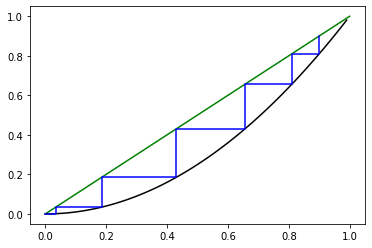

In [ ]:
run_cobweb(dim1, 0.9)

Our cobweb plot tells us that no matter where we start off, percolation doesn't seem to occur. Consider the original density of 0.9: even at that high density we converge back to zero with the one dimensional forest. 

This makes sense for a one-dimensional forest: if there is even one break in the chain of trees, fire transmission stops, so even for a very dense forest we are still likely not to see percolation happen. Let us verify with the actual simulation that we do, indeed, not get percolation even for very high initial densities:

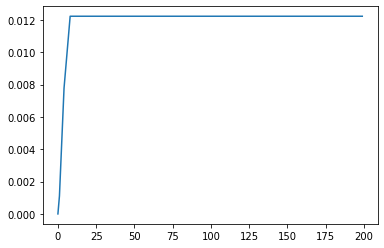

In [ ]:
# Simple CA simulator in Python
#
# *** Forest fire ***
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu

# Modified to run with Python 3

import matplotlib

import pylab as PL
import random as RD
import numpy as SP

RD.seed()

width = 1000
height = 1
initProb = 0.9
empty, tree, fire, char = range(4)

def init():
    global time, config, nextConfig
    global burned_prop
    burned_prop = []

    time = 0

    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    config[height//2, width//2] = fire

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    PL.subplot(1, 2, 1)
    PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.axis('image')
    PL.title('t = ' + str(time))

    global burned_prop
    burned_prop.append(SP.sum(config==3)/(initProb*width*height))
    PL.subplot(1, 2, 2)
    PL.plot(range(len(burned_prop)), burned_prop)

def step():
    global time, config, nextConfig
    global burned_prop
    burned_prop.append(SP.sum(config==3)/(initProb*width*height))
    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == fire:
                state = char
            elif state == tree:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            state = fire
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config

init()
for i in range(200):
  step()

plt.plot(burned_prop)

We started with density = 0.9, and as we can see from the graph, a very small number of trees actually burned down (close to zero). This is strong support to our RGA model!

## Three Dimensional Forest RGA Cobweb Plot Analysis

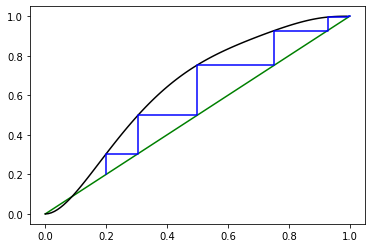

In [ ]:
run_cobweb(dim3, 0.2)

For three dimensions, we have quite an interesting plot: compared to one dimension, it seems that for almost any initial starting position, we end up with percolation (and the entire forest burning down). We can see, however, that there seems to be a threshold somewhere between 0 and 0.2 under which percolation does not occur. 

Comparing to the one dimensional forest, it makes sense that the three dimensional forest is so susceptible to burning. Instead of one possible avenue of fire spread (that is, left and right neighbors only), the 3D forest means that there are 26 tree neighbors that could spread the fire to each tree!

If our RGA model is correct, we can make two predictions:

1.   For initial densities that are slgithly below the apparent thershold, we would not get percolation and the forest would not burn down. When I ran cobweb plot function with initial density 0.08, for instance, the plot tells us we are below the threshold for percolation.

2.   For initial densities that are slightly above the apparent threshold, we would get percolation and the forest would burn down. When I ran cobweb plot function with initial density 0.13, for instance, the plot tells us we are above the threshold for percolation

I test these two predictions by simulating the 3D forest with the code below (and showing only the progression of charred tree density):

[0.0, 0.0001, 0.0006, 0.0011, 0.0014, 0.0017, 0.0019, 0.0022, 0.0024, 0.0028, 0.0034, 0.0038, 0.0041, 0.0047, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0

Text(0, 0.5, 'Proportion of Charred Trees')

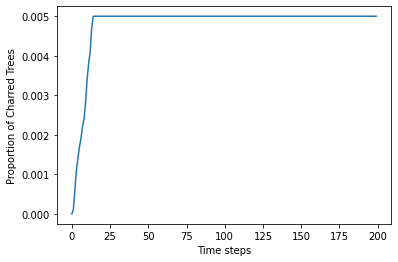

In [ ]:
#Testing first for initial density of 0.08, below the cobweb-apparent threshold:

import matplotlib
matplotlib.use('TkAgg')

import pylab as PL
import random as RD
import numpy as SP

RD.seed()

width = 50
height = 50
depth = 50
initProb = 0.08
empty, tree, fire, char = range(4)

def init():
    global time, config, nextConfig
    global burned_prop
    burned_prop = []

    time = 0

    config = SP.zeros([height, width, depth])
    for x in range(width):
        for y in range(height):
          for z in range(depth):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x, z] = state
    config[height//2, width//2, depth//2] = fire

    nextConfig = SP.zeros([height, width, depth])

def draw():
    PL.cla()
    PL.subplot(1, 2, 1)
    PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.axis('image')
    PL.title('t = ' + str(time))

    global burned_prop
    burned_prop.append(SP.sum(config==3)/(initProb*width*height))
    PL.subplot(1, 2, 2)
    PL.plot(range(len(burned_prop)), burned_prop)

def step():
    global time, config, nextConfig, burned_prop

    burned_prop.append(SP.sum(config==3)/(initProb*width*height*depth))
    time += 1

    for x in range(width):
        for y in range(height):
          for z in range(depth):
            state = config[y, x, z]
            if state == fire:
                state = char
            elif state == tree:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                      for dz in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width, (z+dz)%depth] == fire:
                            state = fire
            nextConfig[y, x, z] = state

    config, nextConfig = nextConfig, config


init()
for i in range(200):
  step()

print(burned_prop)
plt.plot(burned_prop)
plt.xlabel("Time steps")
plt.ylabel("Proportion of Charred Trees")

As we can see from the density plot above, percolation did not happen! The proportion of trees that ultimately burned down, given an initial density of 0.08 that is seemingly below the threshold, was very small (close to zero), as predicted by RGA.

[0.0, 6.153846153846154e-05, 0.0003076923076923077, 0.0004923076923076923, 0.0009846153846153846, 0.0015384615384615385, 0.002276923076923077, 0.0032, 0.004184615384615385, 0.005538461538461538, 0.007261538461538462, 0.009353846153846154, 0.012184615384615384, 0.015507692307692307, 0.019076923076923078, 0.022584615384615384, 0.027323076923076922, 0.032615384615384616, 0.03753846153846154, 0.04369230769230769, 0.05076923076923077, 0.05981538461538462, 0.06984615384615385, 0.08110769230769231, 0.09335384615384615, 0.10621538461538461, 0.12104615384615384, 0.13655384615384616, 0.15415384615384614, 0.1734153846153846, 0.19563076923076922, 0.22283076923076922, 0.25286153846153847, 0.28381538461538464, 0.31704615384615387, 0.3537230769230769, 0.39150769230769233, 0.4298461538461538, 0.4713846153846154, 0.5139076923076923, 0.5531076923076923, 0.5933538461538461, 0.6328, 0.6694769230769231, 0.7008615384615384, 0.7298461538461538, 0.7553846153846154, 0.7784, 0.7992615384615385, 0.81698461538461

Text(0, 0.5, 'Proportion of Charred Trees')

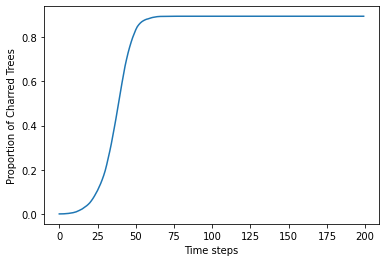

In [ ]:
#Testing first for initial density of 0.13, above the cobweb-apparent threshold:

import matplotlib
matplotlib.use('TkAgg')

import pylab as PL
import random as RD
import numpy as SP

RD.seed()

width = 50
height = 50
depth = 50
initProb = 0.13
empty, tree, fire, char = range(4)

def init():
    global time, config, nextConfig
    global burned_prop
    burned_prop = []

    time = 0

    config = SP.zeros([height, width, depth])
    for x in range(width):
        for y in range(height):
          for z in range(depth):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x, z] = state
    config[height//2, width//2, depth//2] = fire

    nextConfig = SP.zeros([height, width, depth])

def draw():
    PL.cla()
    PL.subplot(1, 2, 1)
    PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.axis('image')
    PL.title('t = ' + str(time))

    global burned_prop
    burned_prop.append(SP.sum(config==3)/(initProb*width*height))
    PL.subplot(1, 2, 2)
    PL.plot(range(len(burned_prop)), burned_prop)

def step():
    global time, config, nextConfig, burned_prop

    burned_prop.append(SP.sum(config==3)/(initProb*width*height*depth))
    time += 1

    for x in range(width):
        for y in range(height):
          for z in range(depth):
            state = config[y, x, z]
            if state == fire:
                state = char
            elif state == tree:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                      for dz in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width, (z+dz)%depth] == fire:
                            state = fire
            nextConfig[y, x, z] = state

    config, nextConfig = nextConfig, config


init()
for i in range(200):
  step()

print(burned_prop)
plt.plot(burned_prop)
plt.xlabel("Time steps")
plt.ylabel("Proportion of Charred Trees")

As we can see from the graph above, for an initial density slightly above the threshold (0.13) the forest burned down (the proportion of charred trees was almost 1), as was predicted by RGA! 

# References

Sayama, H. (2015). Introduction to the modeling and analysis of complex systems. Open SUNY Textbooks.